Here, we do Support Vector Machines to classify magnetic ordering of materials with at least one magnetic element using some selected Numberical and Categorical (that we turn to numerical) features.

In [19]:
import pandas as pd

df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

#visualizing the data
print("Data Overview:")
df.head()         # First 5 rows
df.tail()         # Last 5 rows
df.sample(8)      # Random 8 rows


Data Overview:


,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,...,symmetry,structure,efermi,cbm,vbm,formation_energy_per_atom,energy_above_hull,is_gap_direct,is_stable,parsed_elements
71077,mp-1046486,Ta2CrO8,0.0,FM,3,13.021868,"[Element Cr, Element O, Element Ta]",286.481107,22,Ta4 Cr2 O16,...,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Ta4 Cr2 O16)\nReduced Formula: T...,0.703286,NaN,NaN,-2.388372,0.307578,False,False,"['Cr', 'O', 'Ta']"
27215,mp-1225775,Er2Fe17C2,0.0,FiM,3,12.589116,"[Element C, Element Er, Element Fe]",264.371437,21,Er2 Fe17 C2,...,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Er2 Fe17 C2)\nReduced Formula: E...,4.796053,4.7877,4.8319,-0.067335,0.011120,False,False,"['C', 'Er', 'Fe']"
37056,mp-19176,La2NiRuO6,0.0,FM,4,12.653025,"[Element La, Element Ni, Element O, Element Ru]",253.060509,20,La4 Ni2 Ru2 O12,...,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (La4 Ni2 Ru2 O12)\nReduced Formul...,7.500509,NaN,NaN,-2.633363,0.000000,False,True,"['La', 'Ni', 'O', 'Ru']"
52019,mp-1234555,MgV6O5F19,0.0,FM,4,14.156908,"[Element F, Element Mg, Element O, Element V]",438.864143,31,Mg1 V6 O5 F19,...,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Mg1 V6 O5 F19)\nReduced Formula:...,-0.546958,NaN,NaN,-2.829602,0.076280,False,False,"['F', 'Mg', 'O', 'V']"
70477,mp-542537,SrIn2Rh,0.0,NM,3,24.162168,"[Element In, Element Rh, Element Sr]",193.297346,8,Sr2 In4 Rh2,...,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Sr2 In4 Rh2)\nReduced Formula: S...,5.791374,NaN,NaN,-0.491120,0.000000,False,True,"['In', 'Rh', 'Sr']"
24264,mp-1232323,Cu(BiO2)2,0.0,NM,3,14.121963,"[Element Bi, Element Cu, Element O]",98.853739,7,Cu1 Bi2 O4,...,crystal_system=<CrystalSystem.tet: 'Tetragonal...,Full Formula (Cu1 Bi2 O4)\nReduced Formula: Cu...,5.328612,NaN,NaN,-1.375230,0.076216,False,False,"['Bi', 'Cu', 'O']"
82426,mp-881150,Yb2TiO5,0.0,NM,3,12.489755,"[Element O, Element Ti, Element Yb]",199.836082,16,Yb4 Ti2 O10,...,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Yb4 Ti2 O10)\nReduced Formula: Y...,0.542946,NaN,NaN,-3.750991,0.024705,False,False,"['O', 'Ti', 'Yb']"
25973,mp-1191595,Dy3AlCoS7,0.0,FM,4,20.273736,"[Element Al, Element Co, Element Dy, Element S]",486.569672,24,Dy6 Al2 Co2 S14,...,crystal_system=<CrystalSystem.hex_: 'Hexagonal...,Full Formula (Dy6 Al2 Co2 S14)\nReduced Formul...,5.312525,NaN,NaN,-1.838061,0.044810,False,False,"['Al', 'Co', 'Dy', 'S']"


Now, we do SVM on selected features.

First, without Categorical features to compare.

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.46859292 0.47001392 0.4564686  0.47288307]
Mean CV F1_macro: 0.4669896281668934
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.17      0.74      0.27       547
          FM       0.79      0.38      0.52      5766
         FiM       0.23      0.60      0.33       822
          NM       0.81      0.76      0.78      4107

    accuracy                           0.55     11242
   macro avg       0.50      0.62      0.48     11242
weighted avg       0.73      0.55      0.59     11242



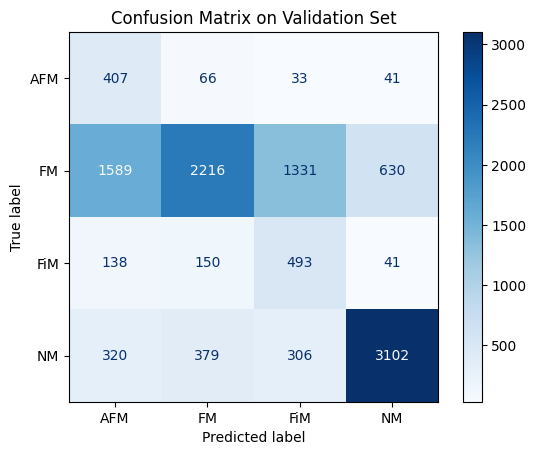

In [20]:
#Without Categorical features.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")


# === 2. drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom"]


df = df.dropna(subset=numerical_features  + ["ordering"])



# === 3. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
], axis=1)

# === 4. Encode labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 5. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 6. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma="scale", class_weight="balanced"))
])

# === 7. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 8. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 9. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 10. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


Since there are very few Antiferromagnets and Ferrimagnets, the model learns very little about them, hence the small precision.

Now we add Categorical features. Each material is composed of elements, so we do one-hot encoding to label whether that material has that elements or not.

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.58391449 0.58907857 0.58396921 0.57812042]
Mean CV F1_macro: 0.5837706725994825
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.23      0.63      0.33       547
          FM       0.83      0.64      0.73      5766
         FiM       0.32      0.48      0.38       822
          NM       0.92      0.91      0.91      4107

    accuracy                           0.73     11242
   macro avg       0.58      0.66      0.59     11242
weighted avg       0.80      0.73      0.75     11242



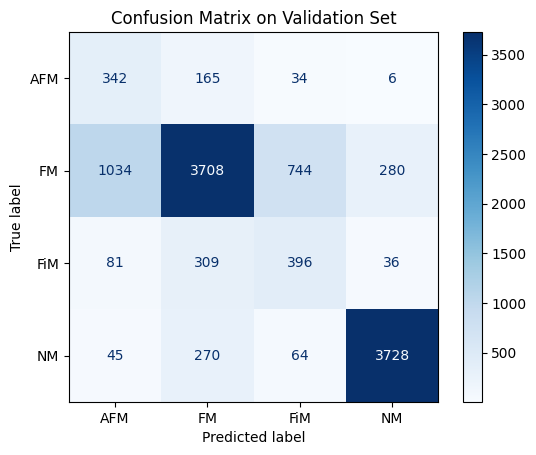

In [1]:
#With Categorical Variables. "Elements" is one-hot encoded using MultiLabelBinarizer(). "Crystal_system" is label encoded using LabelEncoder

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4.drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 5. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 6. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 7. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 8. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 9. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 10. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=0.01, class_weight="balanced"))
])

# === 11. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 12. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 13. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 14. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


With the addition of Categorical variables, the precision is slightly higher. We need to increase the data set for AFM for the model to learn better, for that we use SMOTE later on.

Now, we do hyperparameter tuning using GridSearchCV. For the sake of time and storage, we tune using only numerical features.

Train size: 33723, Validation size: 11242, Test size: 11242
Best parameters: {'svm__C': 20, 'svm__gamma': 0.5}
Best f1_macro score: 0.5250687551645514
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.24      0.58      0.34       547
          FM       0.78      0.61      0.68      5766
         FiM       0.26      0.44      0.32       822
          NM       0.82      0.81      0.81      4107

    accuracy                           0.67     11242
   macro avg       0.52      0.61      0.54     11242
weighted avg       0.73      0.67      0.69     11242



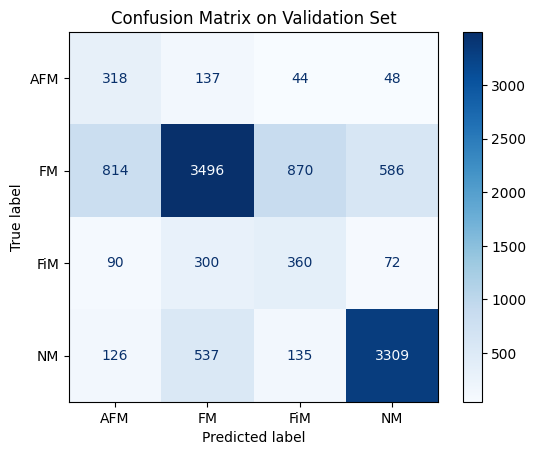

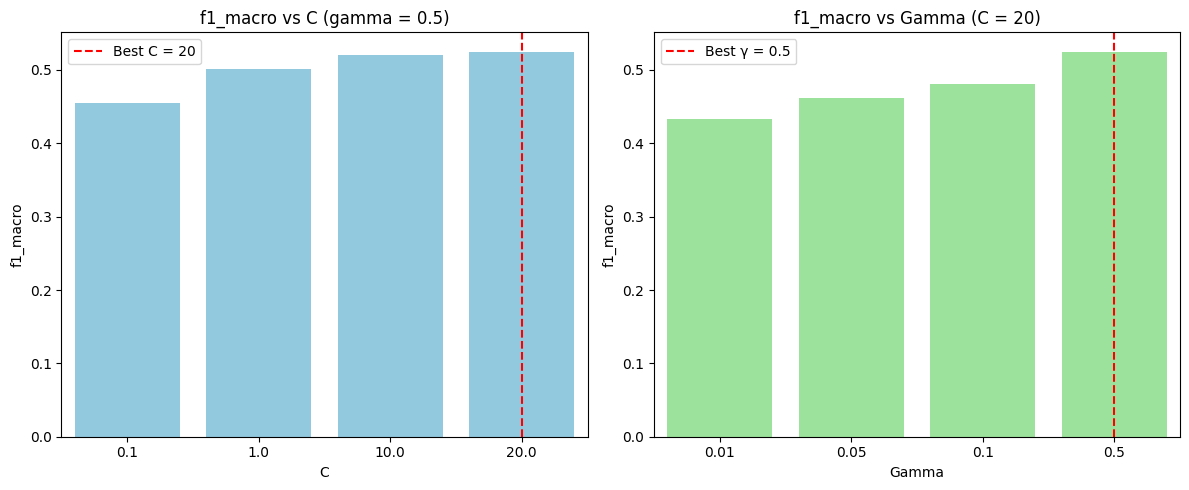

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse elements ===
def parse_elements(val):
    if pd.isna(val): return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]
df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract and encode crystal system ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str): return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4. Drop NAs ===
numerical_features = [
    "band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites",
    "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"
]
df = df.dropna(subset=numerical_features + ["ordering"])

# === 5. Feature matrix (numerical only) ===
X = df[numerical_features].reset_index(drop=True)

# === 6. Encode target ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 7. Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 8. Define pipeline and grid ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", class_weight="balanced"))
])

param_grid = {
    "svm__C": [0.1, 1, 10, 20],
    "svm__gamma": [0.01, 0.05, 0.1, 0.5]
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    svm_pipeline, param_grid,
    scoring="f1_macro", cv=cv,
    return_train_score=True, n_jobs=-1
)

# === 9. Fit ===
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best f1_macro score:", grid_search.best_score_)

# === 10. Evaluate on validation set ===
y_val_pred = grid_search.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 11. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()

# === 12. Plot f1_macro vs C (for best gamma) and vs gamma (for best C) ===
results_df = pd.DataFrame(grid_search.cv_results_)
best_params = grid_search.best_params_
best_C = best_params["svm__C"]
best_gamma = best_params["svm__gamma"]

plt.figure(figsize=(12, 5))

# --- Plot 1: f1_macro vs C (gamma fixed at best_gamma) ---
plt.subplot(1, 2, 1)
subset_c = results_df[results_df["param_svm__gamma"] == best_gamma]
sns.barplot(
    data=subset_c,
    x="param_svm__C",
    y="mean_test_score",
    color="skyblue"
)
highlight_idx_c = subset_c[subset_c["param_svm__C"] == best_C].index[0]
plt.axvline(
    x=subset_c["param_svm__C"].tolist().index(best_C),
    color="red", linestyle="--", label=f"Best C = {best_C}"
)
plt.title(f"f1_macro vs C (gamma = {best_gamma})")
plt.xlabel("C")
plt.ylabel("f1_macro")
plt.legend()

# --- Plot 2: f1_macro vs gamma (C fixed at best_C) ---
plt.subplot(1, 2, 2)
subset_g = results_df[results_df["param_svm__C"] == best_C]
sns.barplot(
    data=subset_g,
    x="param_svm__gamma",
    y="mean_test_score",
    color="lightgreen"
)
plt.axvline(
    x=subset_g["param_svm__gamma"].tolist().index(best_gamma),
    color="red", linestyle="--", label=f"Best γ = {best_gamma}"
)
plt.title(f"f1_macro vs Gamma (C = {best_C})")
plt.xlabel("Gamma")
plt.ylabel("f1_macro")
plt.legend()

plt.tight_layout()
plt.show()



We see that among the parameters selected C=20, gamma=0.5 has the best score with mean F1_macro score of 0.525. However, we expect the optimal parameters to change when we include Categorical variables. In fact, in the cell above we already computed a mean F1_macro score of 0.58 with Categorical variables when we used C=10 and Gamma=0.01. This was optained previously by GridSearchCV while using all data (see SVM_for_4_Magnetic_Classes). So, we will stick with that.

Now we try to tune C for a given Gamma=0.01 and Kernel="rbf"

Best parameters: {'svm__C': 16}
Best f1_macro score: 0.591323590844805
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.23      0.60      0.34       547
          FM       0.83      0.66      0.73      5766
         FiM       0.32      0.45      0.37       822
          NM       0.92      0.91      0.91      4107

    accuracy                           0.73     11242
   macro avg       0.57      0.65      0.59     11242
weighted avg       0.79      0.73      0.75     11242



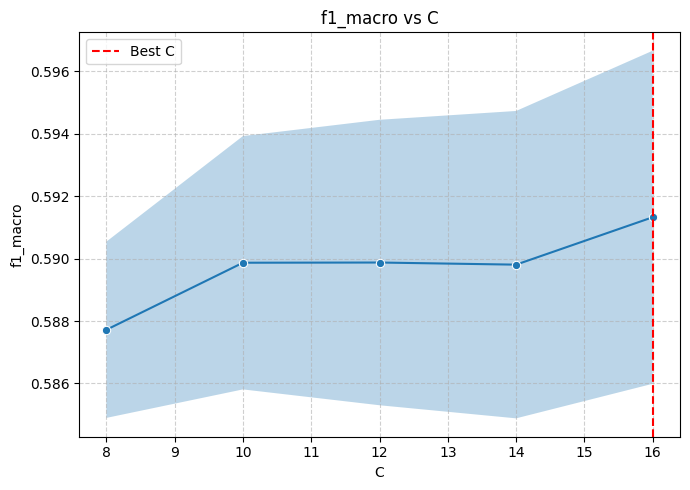

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]
df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract crystal_system ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Label encode crystal_system ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 5. Drop NA and define features ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]
df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# === 11. SVM pipeline and hyperparameter grid ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", gamma=0.01, class_weight="balanced"))
])

param_grid = {
    "svm__C": [8, 10, 12, 14, 16]
}

grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    scoring="f1_macro",
    cv=4,
    return_train_score=True,
    n_jobs=-1
)

# === 12. Run GridSearch ===
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best f1_macro score:", grid_search.best_score_)

# === 13. Evaluate on Validation Set ===
y_val_pred = grid_search.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 14. Plot f1_macro vs C ===
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(7, 5))
sns.lineplot(x="param_svm__C", y="mean_test_score", data=results_df, marker="o")

plt.fill_between(
    results_df["param_svm__C"].astype(float),
    results_df["mean_test_score"] - results_df["std_test_score"],
    results_df["mean_test_score"] + results_df["std_test_score"],
    alpha=0.3
)

plt.axvline(grid_search.best_params_["svm__C"], color="red", linestyle="--", label="Best C")
plt.title("f1_macro vs C")
plt.xlabel("C")
plt.ylabel("f1_macro")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Best parameters are C=16 and gamma=0.01. Now we do SMOTE to increase the number of AFM in the training set. 

In [6]:
pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Train size: 33723, Validation size: 11242, Test size: 11242
Number of AFM samples after SMOTE in training set: 17297
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.28      0.26      0.27       547
          FM       0.80      0.85      0.82      5766
         FiM       0.41      0.27      0.33       822
          NM       0.91      0.90      0.90      4107

    accuracy                           0.79     11242
   macro avg       0.60      0.57      0.58     11242
weighted avg       0.78      0.79      0.79     11242



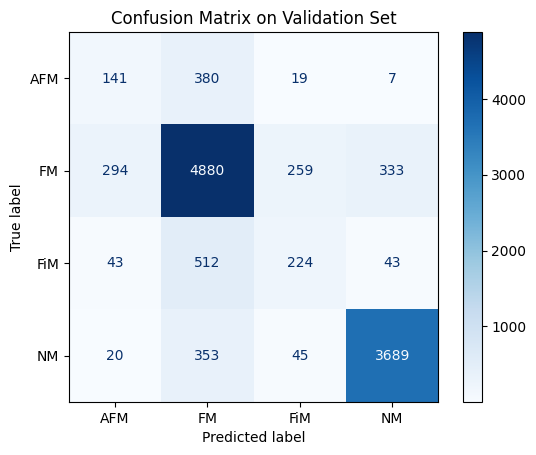

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]
df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract crystal_system from symmetry ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Label encode crystal_system ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 5. Drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define pipeline with SMOTE and fixed SVM parameters ===
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(C=16, gamma=0.01, kernel='rbf', class_weight='balanced'))
])

# === 12. Fit on training data ===
pipeline.fit(X_train, y_train)

# Extract the SMOTE step and transform X_train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Get the AFM class index from label encoder
afm_index = list(le.classes_).index("AFM")
num_afm_after_smote = np.sum(y_train_resampled == afm_index)
print(f"Number of AFM samples after SMOTE in training set: {num_afm_after_smote}")

# === 13. Predict on validation set ===
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 14. Confusion Matrix on Validation Set ===
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=le.classes_)
disp_val.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()



AFM precision got better after SMOTE.

Now, we determine feature importance. To do that we need to set Kernel to "linear".

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.50737809 0.50216458 0.50084372 0.49743559]
Mean CV F1_macro: 0.5019554944203078
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.17      0.73      0.28       547
          FM       0.83      0.38      0.52      5766
         FiM       0.23      0.65      0.34       822
          NM       0.89      0.85      0.87      4107

    accuracy                           0.59     11242
   macro avg       0.53      0.65      0.50     11242
weighted avg       0.78      0.59      0.62     11242



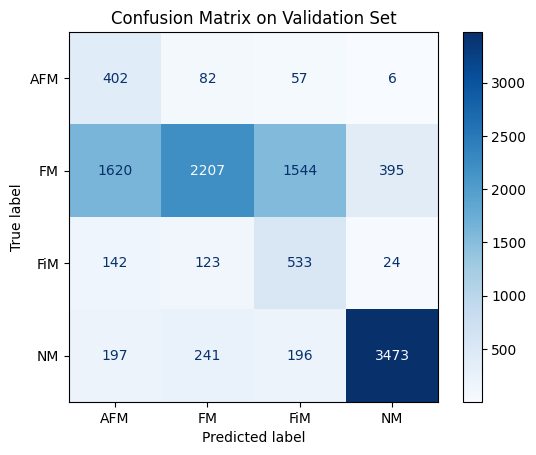

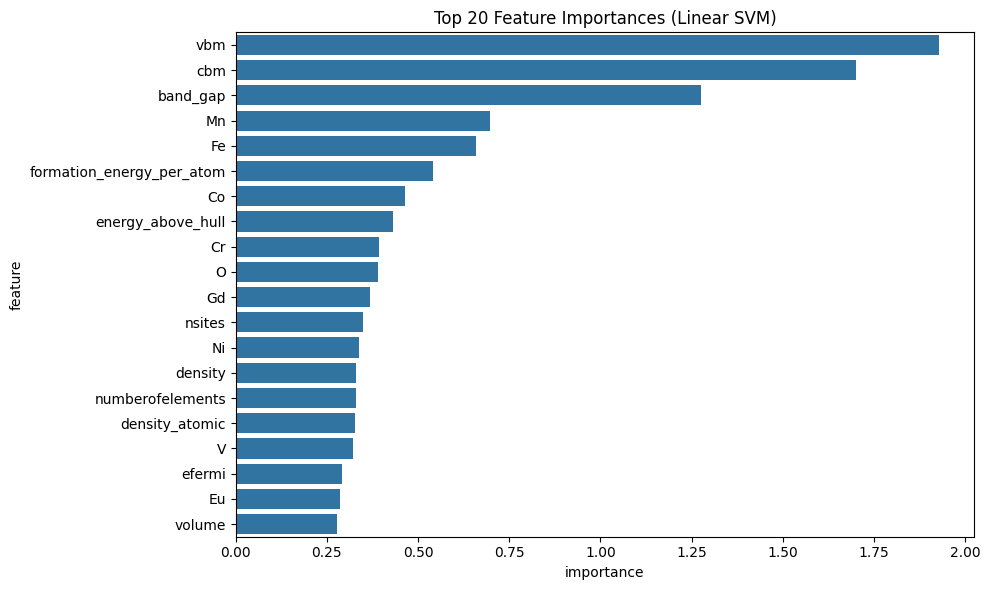

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import re

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])


# === 5. Drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define SVM Pipeline with linear kernel ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=10, class_weight="balanced"))
])

# === 12. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 13. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 14. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 15. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()

# === 16. Plot Feature Importance ===
model = svm_pipeline.named_steps["svm"]
feature_names = X.columns
coefs = model.coef_

# Multiclass → take average absolute weight across classes
importance = np.abs(coefs).mean(axis=0)

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importance
}).sort_values(by="importance", ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(20), x="importance", y="feature")
plt.title("Top 20 Feature Importances (Linear SVM)")
plt.tight_layout()
plt.show()
